FIAP - Tecnólogo de Inteligência Artificial


# Machine Learning & Modelling - Checkpoint #2 e Checkpoint #3 

Faça _individualmente_ a lista abaixo para praticar análise descritiva, gráficos e regressão linear. Utilize os conceitos vistos em sala, os notebooks disponíveis e consulte documentações de Python na Internet. Em caso de dúvidas, contate o Prof. Michel. 

**Entrega**: 26/maio/2022, via Teams - IMPORTANTE: renomeie o notebook incluindo seu nome! 



## Dataset

O dataset mapeia características de pessoas cruzando com o valor pago pelo seu seguro de saúde nos EUA. Os dados são compostos pelas seguintes variáveis: 

- `age` : idade do indivíduo 
- `sex` : sexo do indivíduo 
- `bmi` : "Body mass index", o IMC (índice de massa corporal)
- `children` : número de filhos
- `smoker` : fumante ou não?
- `region` : região de residência da pessoa
- `charges` : tarifa paga pela pessoa

Os dados podem ser lidos diretamente a partir desta URL: https://tinyurl.com/42rvaw4p


## Atividades 

A partir da leitura do dataset, realize as seguintes tarefas: 

### Gerais (CK #2)

1. Faça uma análise descritiva geral dos dados, para se familirizar com o dataset 

### Gráficos (CK #2)

Lembrem-se! Todo gráfico precisa ter um título, o nome do Eixo X e do Eixo Y! Estas alterações nos gráficos são **obrigatórias**. Outras alterações de layout são bem-vindas, e podem gerar nota extra ;D

2. Faça um histograma com as idades das pessoas
3. Faça uma gráfico com a distribuição das pessoas por sexo
4. Faça um boxplot de gastos por região. Cada região deve estar em um boxplot distinto 
5. Faça um gráfico de dispersão (scatter plot) de BMI (eixo X) e Charges (eixo Y). Defina a cor dos pontos pela variável "sex"
6. Faça um pairplot (da biblioteca seaborn) de todas as variáveis. Defina a cor (parâmetro _hue_ ) em função da variável smoker. Observando especialmente os gráficos da linha ou coluna das tarifas (charges), quais são suas principais conclusões? 


### Filtros de dataframes (CK #3)

7. Faça um dataframe menor selecionamento apenas selecionando as pessoas que pagam acima do valor médio da tarifa. Descreva o perfil destas pessoas em termos de suas variáveis: ou seja, possuem quantos filhos? qual a idade média? são geralmente os homens ou as mulheres? etc. 
8. Verifique quantas pessoas existem abaixo dos 30 anos E que são fumantes


### Regressão linear (CK #3)

9. Padronize as features do dataset 
10. Execute uma regressão linear simples usando todas as features (o label é o valor pago do seguro). Calcule o `R2 score` e interprete o valor desta métrica

In [309]:
# Imports necessários
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [310]:

df = pd.read_csv(f"insurance.csv")

In [311]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [312]:
df.shape

(1338, 7)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [314]:
df["sex"].values

array(['female', 'male', 'male', ..., 'female', 'female', 'female'],
      dtype=object)

In [315]:
df[df["sex"] == "male"]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1327,51,male,30.030,1,no,southeast,9377.90470
1329,52,male,38.600,2,no,southwest,10325.20600


In [316]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [317]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


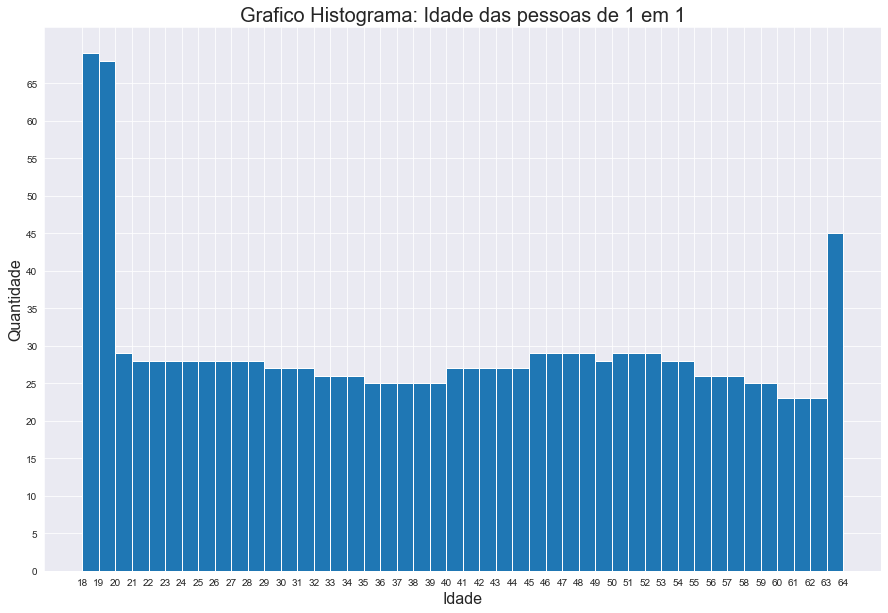

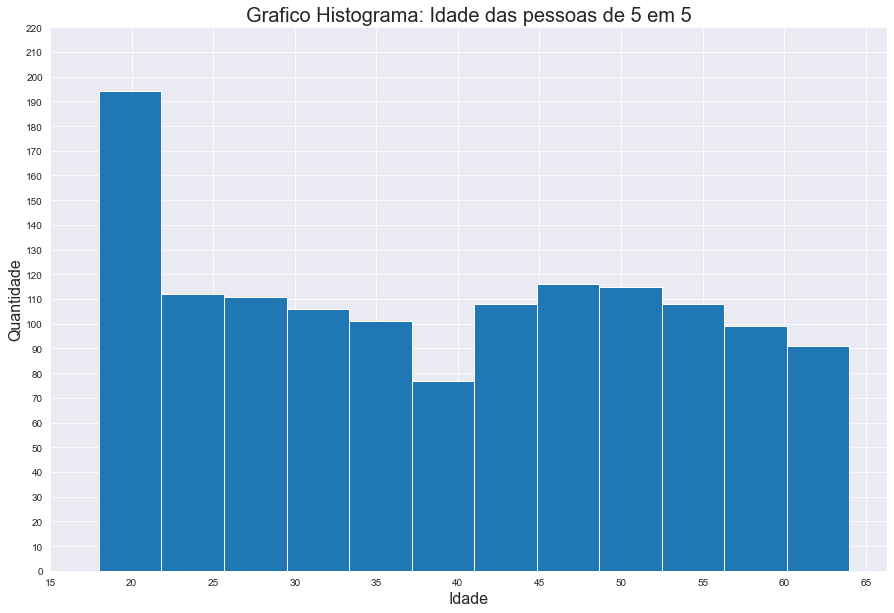

In [318]:
df.hist(column = "age",bins = 46,figsize=(15, 10))
plt.title("Grafico Histograma: Idade das pessoas de 1 em 1",fontsize=20)
plt.xticks(range(18,65))
plt.yticks(range(0,70,5))
plt.ylabel("Quantidade", fontsize=16)
plt.xlabel("Idade", fontsize=16)
plt.show()

df.hist(column = "age",bins = 12,figsize=(15, 10))
plt.title("Grafico Histograma: Idade das pessoas de 5 em 5",fontsize=20)
plt.xticks(range(15,70,5))
plt.yticks(range(0,230,10))
plt.ylabel("Quantidade", fontsize=16)
plt.xlabel("Idade", fontsize=16)
plt.show()



In [319]:
male = df[df.sex=="male"].count()
female = df[df.sex=="female"].count()
sexos = df["sex"].unique()
coluna = (sexos[1],sexos[0])
quantidade = (male["sex"],female["sex"])

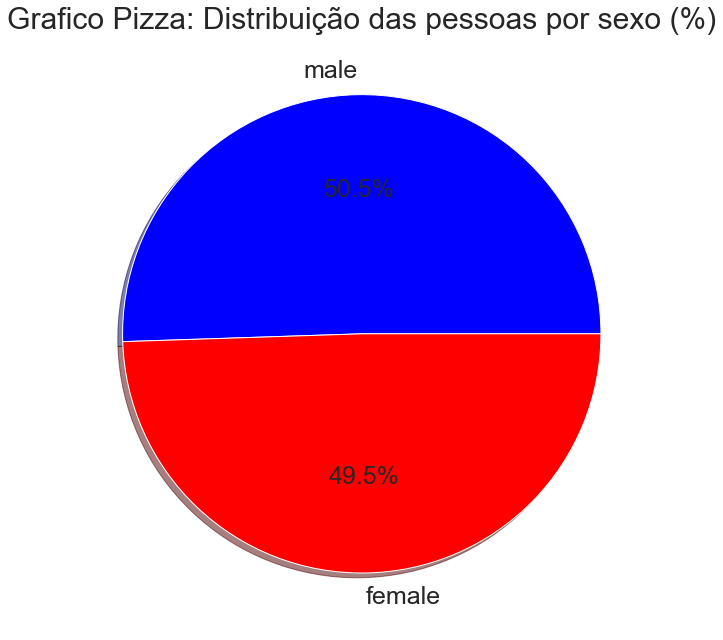

In [320]:
plt.figure(figsize=(11,11))
plt.pie(autopct="%1.1f%%",x=quantidade,labels=coluna,shadow=True,colors=('b','r'),textprops={'fontsize': 25})

plt.title("Grafico Pizza: Distribuição das pessoas por sexo (%)",fontsize=30)


plt.show()

C:\Users\mathe\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


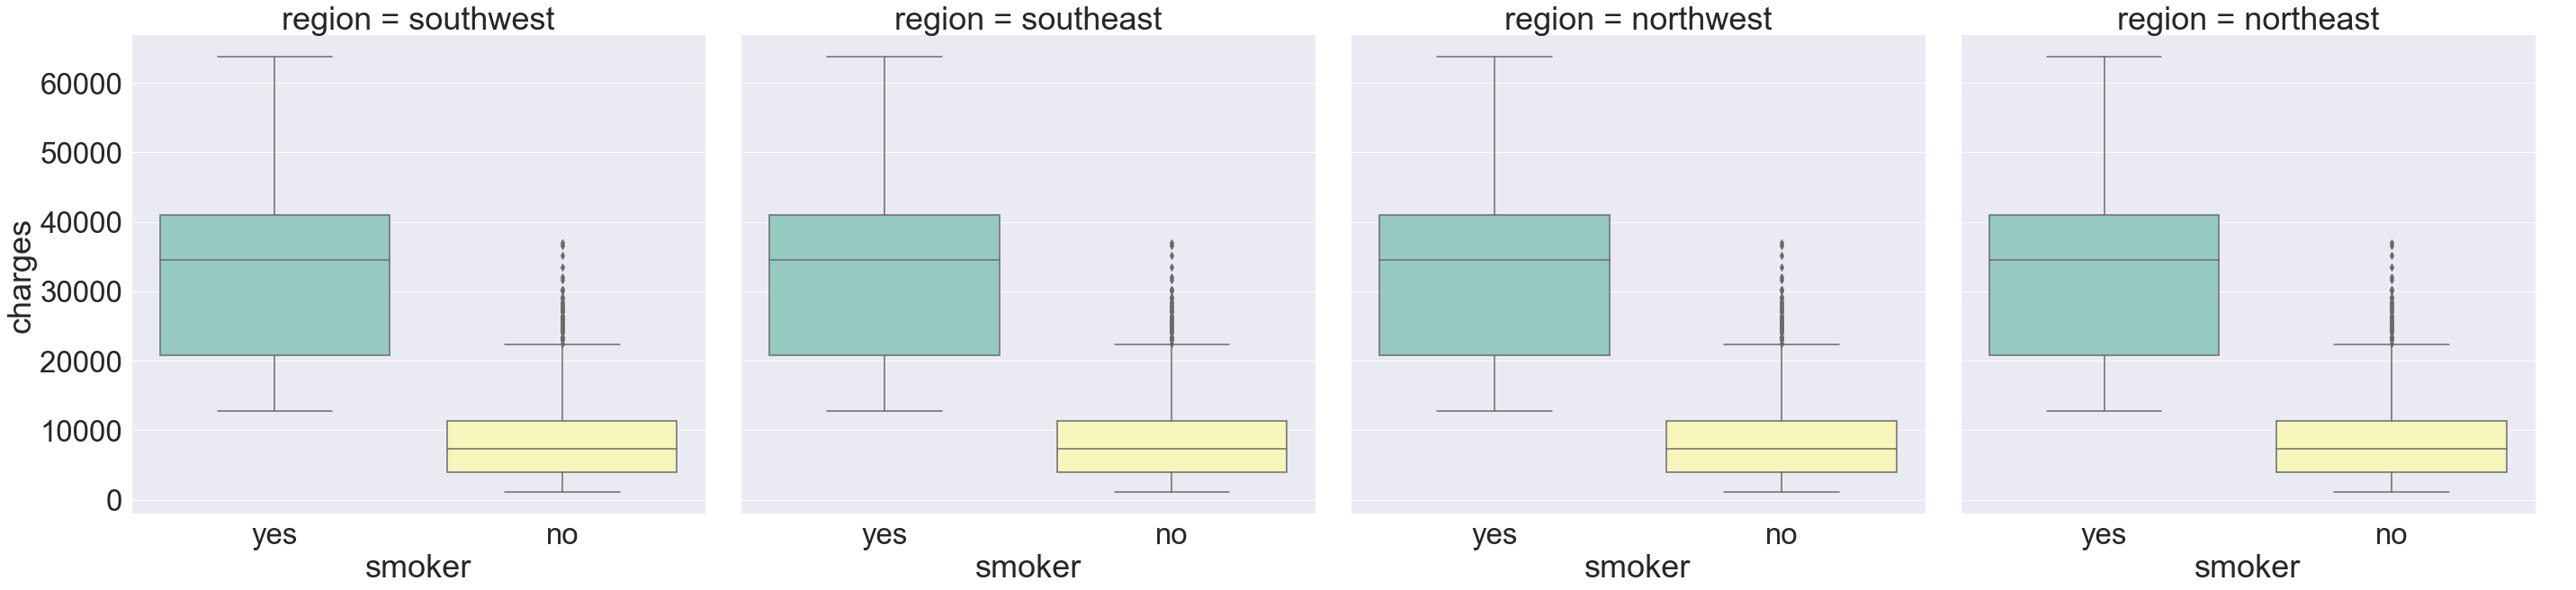

In [334]:
sns.set(font_scale = 1  )
graph = sns.FacetGrid(df, col = "region",height=10, aspect=1)
graph.map(sns.boxplot,data = df,x='smoker',y = 'charges', palette = 'Set3',dodge = False)
graph.add_legend();

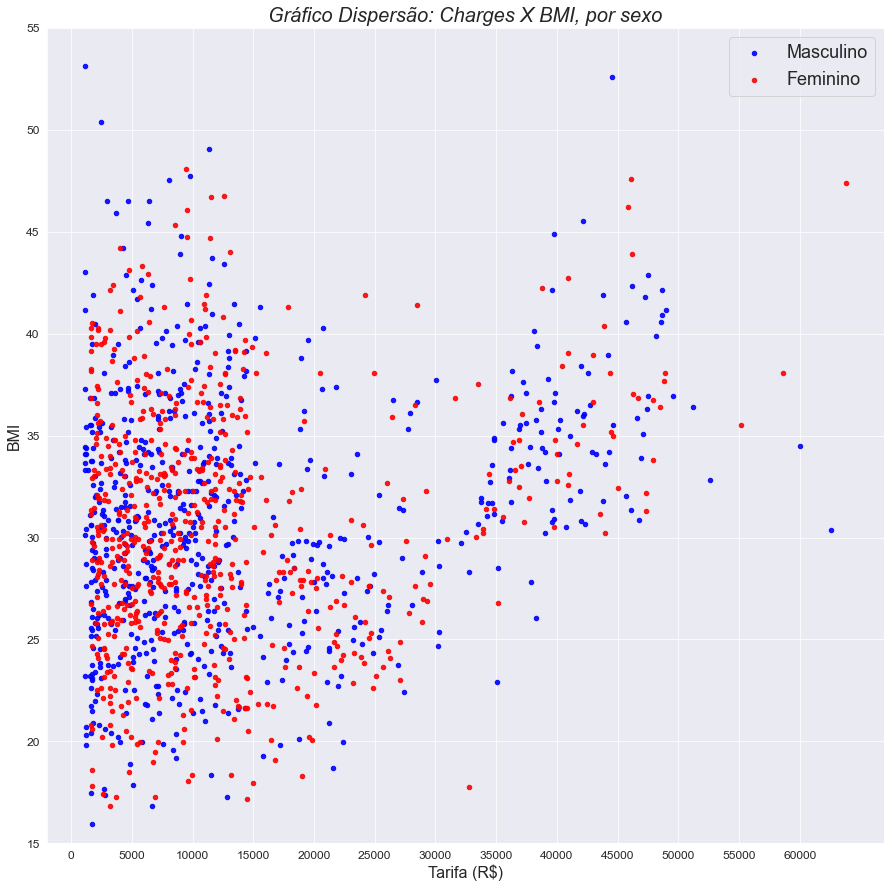

In [322]:
fig, ax = plt.subplots(figsize=(15, 15))
# ax.scatter(df["charges"], df["bmi"])
ax.set_title("Gráfico Dispersão: Charges X BMI, por sexo",
            fontsize=20, fontstyle="italic")
ax.set_ylabel("BMI", fontsize=16)
ax.set_xlabel("Tarifa (R$)", fontsize=16)

ax.grid(True)

ax.set_xticks([i for i in range(0, 65000, 5000)])
ax.tick_params(axis="x", labelsize=12)
ax.set_ylim(15, 55)
ax.tick_params(axis="y", labelsize=12)


male_charges = df[(df["sex"] == "male")]["charges"]
male_bmi = df[(df["sex"] == "male")]["bmi"]
ax.scatter(x=male_charges,y= male_bmi, s=20, c = "b", alpha=0.9,edgecolors="b")

female_charges = df[(df["sex"] == "female")]["charges"]
female_bmi = df[(df["sex"] == "female")]["bmi"]
ax.scatter(x=female_charges,y= female_bmi, s=20, c = "r", alpha=0.9,edgecolors="r")
ax.legend(["Masculino",'Feminino'], loc="upper right", fontsize=18)


plt.show()

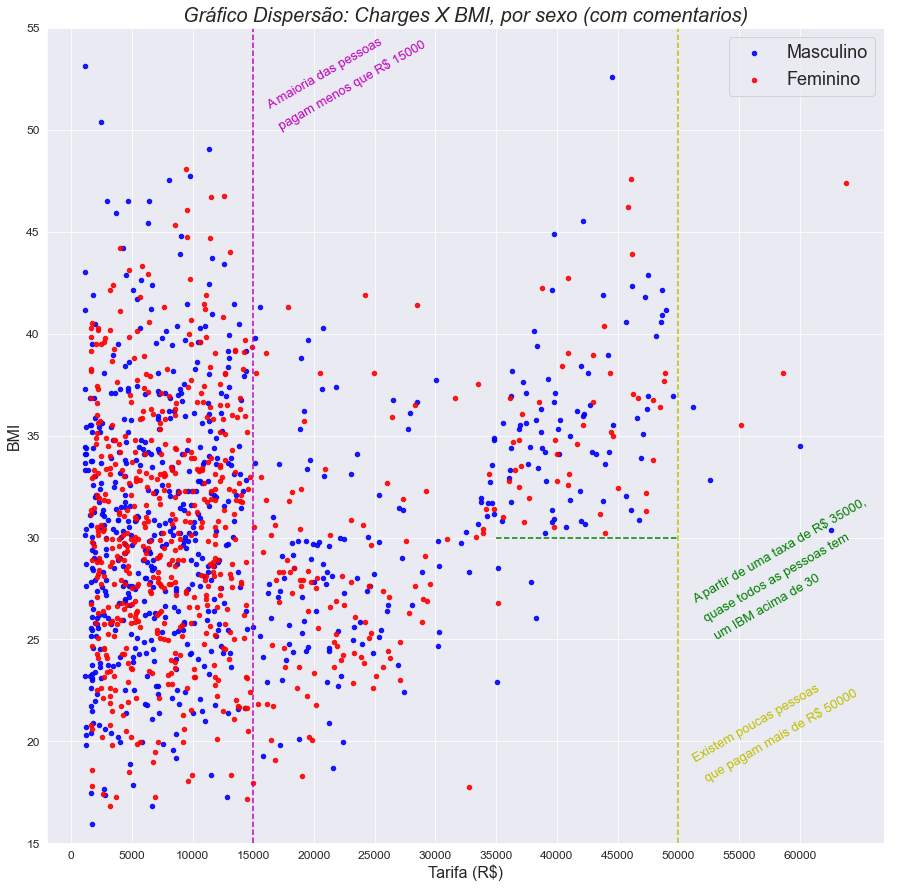

In [323]:
fig, ax = plt.subplots(figsize=(15, 15))
# ax.scatter(df["charges"], df["bmi"])
ax.set_title("Gráfico Dispersão: Charges X BMI, por sexo (com comentarios)",
            fontsize=20, fontstyle="italic")
ax.set_ylabel("BMI", fontsize=16)
ax.set_xlabel("Tarifa (R$)", fontsize=16)

ax.grid(True)

ax.set_xticks([i for i in range(0, 65000, 5000)])
ax.tick_params(axis="x", labelsize=12)
ax.set_ylim(15, 55)
ax.tick_params(axis="y", labelsize=12)


male_charges = df[(df["sex"] == "male")]["charges"]
male_bmi = df[(df["sex"] == "male")]["bmi"]
ax.scatter(x=male_charges,y= male_bmi, s=20, c = "b", alpha=0.9,edgecolors="b")

female_charges = df[(df["sex"] == "female")]["charges"]
female_bmi = df[(df["sex"] == "female")]["bmi"]
ax.scatter(x=female_charges,y= female_bmi, s=20, c = "r", alpha=0.9,edgecolors="r")
ax.legend(["Masculino",'Feminino'], loc="upper right", fontsize=18)


ax.text(x=51000, y=18, s="Existem poucas pessoas \nque pagam mais de R$ 50000",
       fontsize=13, linespacing=2, rotation=30,color='y')


ax.text(x=51000, y=25, s="A partir de uma taxa de R$ 35000,\nquase todos as pessoas tem \num IBM acima de 30",
       fontsize=13, linespacing=2, rotation=30,color='g')

ax.text(x=16000, y=50, s="A maioria das pessoas \npagam menos que R$ 15000",
       fontsize=13, linespacing=2, rotation=30,color='m')


# adicionar as linhas
ax.vlines(x=50000, ymin=15, ymax=55, color="y", linestyles="dashed")
ax.vlines(x=15000, ymin=15, ymax=55, color="m", linestyles="dashed")
ax.hlines(y=30, xmin=35000, xmax=50000, color="g", linestyles="dashed")
# ax.hlines(y=180, xmin=0, xmax=55, color="red", linestyles="dashed")

plt.show()

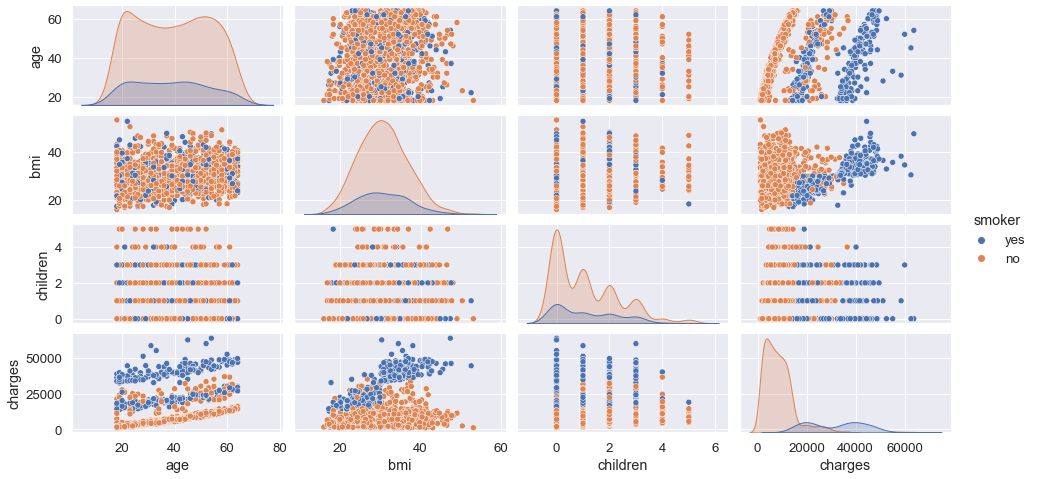

In [336]:
sns.set(font_scale = 1.2)
sns.pairplot(df,hue='smoker',height=1.7, aspect=2)

## Conclusoes
 - Todas as pessoas acima de 40 anos nao sao fumantes
 - Pessoas com 4+ filhos pagam menos Charges
 - Uma maioria esmagadora das pessoas que pagam menos de R$ 20000 nao sao fumantes